In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Preparar bases de dados

In [117]:
base = pd.read_table(r'microdados_enade_2018.txt', sep=';', encoding='latin-1', decimal=',')

In [248]:
# filtrar variáveis necessárias para análise
df = base[['CO_IES', 'CO_CATEGAD', 'CO_CURSO', 'CO_GRUPO', 'CO_MODALIDADE', 'CO_UF_CURSO', 'CO_TURNO_GRADUACAO', 'NT_GER', 'NT_FG', 'NT_CE']]

# base dos cursos de economia
df_economia = df[df['CO_GRUPO'] == 13].reset_index().drop(columns=['CO_GRUPO'])

# base por natureza da entidade
publicas = [93, 115, 116, 10001, 10002, 10003]

df_economia['natureza_entidade'] = df_economia['CO_CATEGAD'].apply(lambda x: "Pública" if x in publicas else "Privada")

df_economia_publicas = df_economia[df_economia['natureza_entidade'] == "Pública"]
df_economia_privadas = df_economia[df_economia['natureza_entidade'] == "Privada"]

# base por turno
df_economia['turno'] = df_economia['CO_TURNO_GRADUACAO'].apply(lambda x: "Matutino" if x == 1 else "Vespertino" if x == 2 else "Integral" if x == 3 else "Noturno")

# UFPR
df_economia_ufpr = df_economia[df_economia['CO_IES'] == 571]

## Primeiras informações

In [160]:
tot_alunos = len(base)

tot_ies = len(base['CO_IES'].unique())

tot_ies_economia = len(df_economia['CO_IES'].unique())

tot_cursos_economia = len(df_economia['CO_CURSO'].unique())

tot_cursos_economia_publicos = len(df_economia_publicas['CO_CURSO'].unique())
tot_cursos_economia_privados = tot_cursos_economia - tot_cursos_economia_publicos

tot_cursos_economia_presenciais = len(df_economia[df_economia['CO_MODALIDADE'] == 1]['CO_CURSO'].unique())
tot_cursos_economia_distancia = tot_cursos_economia - tot_cursos_economia_presenciais

tot_cursos_economia_integral = len(df_economia[df_economia['turno'] == "Integral"]['CO_CURSO'].unique())
tot_cursos_economia_matutino = len(df_economia[df_economia['turno'] == "Matutino"]['CO_CURSO'].unique())
tot_cursos_economia_vespertino = len(df_economia[df_economia['turno'] == "Vespertino"]['CO_CURSO'].unique())
tot_cursos_economia_noturno = len(df_economia[df_economia['turno'] == "Noturno"]['CO_CURSO'].unique())

print("Total de alunos:", tot_alunos)
print("Total de IES:", tot_ies)
print("Total de IES com economia:", tot_ies_economia)
print("Total de cursos de economia:", tot_cursos_economia)
print("Total de cursos de economia públicos:", tot_cursos_economia_publicos)
print("Total de cursos de economia privados:", tot_cursos_economia_privados)
print("Total de cursos de economia presenciais:", tot_cursos_economia_presenciais)
print("Total de cursos de economia distância:", tot_cursos_economia_distancia)
print("Total de cursos de economia integral:", tot_cursos_economia_integral)
print("Total de cursos de economia matutino:", tot_cursos_economia_matutino)
print("Total de cursos de economia vespertino:", tot_cursos_economia_vespertino)
print("Total de cursos de economia noturno:", tot_cursos_economia_noturno)

Total de alunos: 548127
Total de IES: 1762
Total de IES com economia: 160
Total de cursos de economia: 195
Total de cursos de economia públicos: 100
Total de cursos de economia privados: 95
Total de cursos de economia presenciais: 187
Total de cursos de economia distância: 8
Total de cursos de economia integral: 37
Total de cursos de economia matutino: 43
Total de cursos de economia vespertino: 8
Total de cursos de economia noturno: 164


# Nota geral dos cursos de conomia

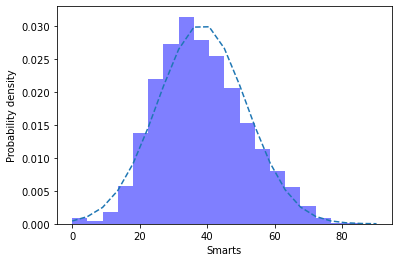

In [233]:
x = df_economia['NT_GER'].dropna()

mu = x.mean()
sigma = x.std()
num_bins = 20

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=True, 
    color='blue', 
    # edgecolor='black', 
    # linewidth=1, 
    alpha=0.5,)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))

ax.plot(bins, y, '--')
ax.set_xlabel('Smarts')
ax.set_ylabel('Probability density')


media = round(x.mean(), 1)
mediana = round(x.median(), 1)
std = round(x.std(), 1)


## Ensino público vs. privado

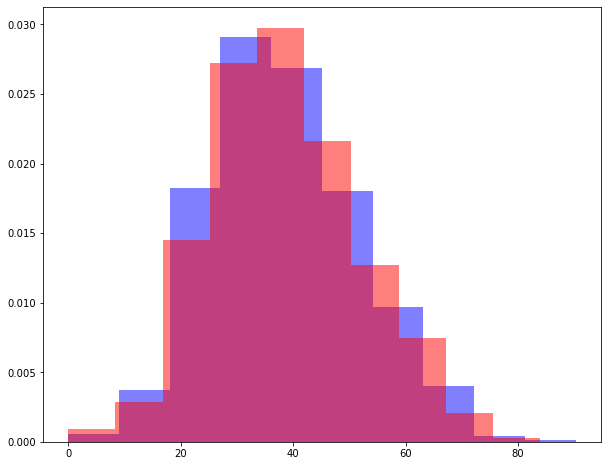

,Pública,Privada
,0,0
count,5206.000000,2867.000000
mean,38.356992,38.470841
std,13.073115,13.256307
min,0.000000,0.000000
25%,28.800000,29.200000
50%,37.200000,37.100000
75%,47.000000,47.100000
max,90.200000,83.900000
median,37.200000,37.100000


In [302]:
x1 = df_economia_publicas['NT_GER']
x2 = df_economia_privadas['NT_GER']

fig, ax = plt.subplots(sharex=True, sharey=True)
ax1 = ax.hist(x1, num_bins, color='blue', alpha=0.5, label='Pública', density=True)
ax2 = ax.hist(x2, num_bins, color='red', alpha=0.5, label='Privada', density=True)

fig.set_size_inches(10, 8)

plt.show()

x1_desc = pd.concat([x1.describe(), pd.DataFrame.from_dict({"median" : x1.median()}, orient='index')])
x2_desc = pd.concat([x2.describe(), pd.DataFrame.from_dict({"median" : x2.median()}, orient='index')])

desc = pd.concat([x1_desc, x2_desc], axis=1, keys=['Pública', 'Privada'])

desc



# Economia na UFPR

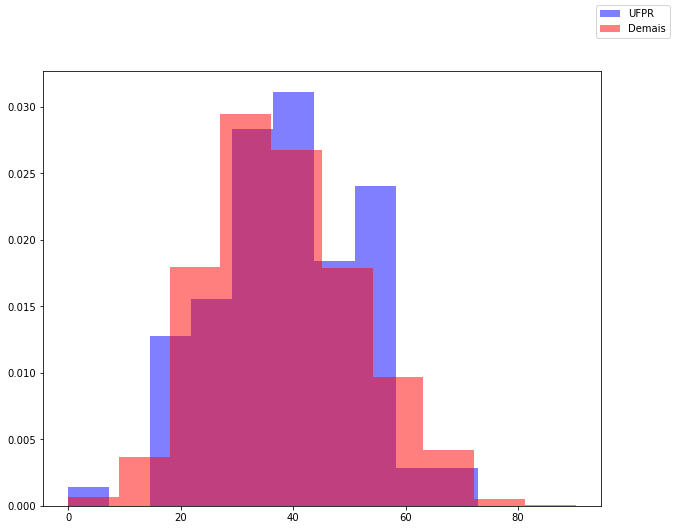

,UFPR,Demais
,0,0
count,97.000000,7976.000000
mean,38.806186,38.392452
std,13.186347,13.137918
min,0.000000,0.000000
25%,30.900000,28.900000
50%,38.800000,37.100000
75%,49.500000,47.000000
max,72.800000,90.200000
median,38.800000,37.100000


In [300]:
x1 = df_economia_ufpr['NT_GER']
x2 = df_economia[df_economia['CO_IES'] != 571]['NT_GER']

num_bins = 10

fig, ax = plt.subplots(sharex=True)
ax1 = ax.hist(x1, num_bins, color='blue', alpha=0.5, label='UFPR', density=True)
ax2 = ax.hist(x2, num_bins, color='red', alpha=0.5, label='Demais', density=True)

fig.legend()

fig.set_size_inches(10, 8)

plt.show()

x1_desc = pd.concat([x1.describe(), pd.DataFrame.from_dict({"median" : x1.median()}, orient='index')])
x2_desc = pd.concat([x2.describe(), pd.DataFrame.from_dict({"median" : x2.median()}, orient='index')])

desc = pd.concat([x1_desc, x2_desc], axis=1, keys=['UFPR', 'Demais'])
desc